In [61]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [62]:
def estimate_gaussian(X):
    mu = np.mean(X, axis =0)
    sigma2 = np.var(X, axis =0)
    return mu, sigma2



def multivariate_gaussian(x, mu, cov):
    #Calculation of multivariate guassian pdf
    #x is the point, mu: list mean of all fields, 
    #cov: covariance matrix
    
    size = len(x)
    if size == len(mu) and (size, size) == cov.shape:
        det = np.linalg.det(cov)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        
        norm_const = 1.0/ ( math.pow((2*np.pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inv = np.linalg.inv(cov)
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")   

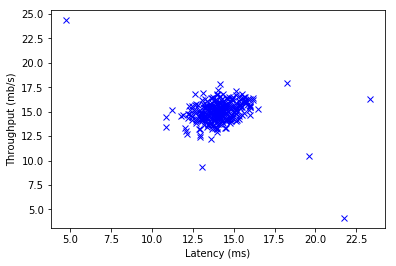

In [63]:
X = pd.read_csv('X.csv')
plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'bx')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');
plt.show()

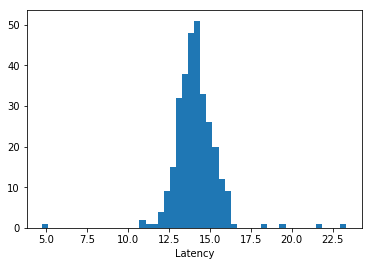

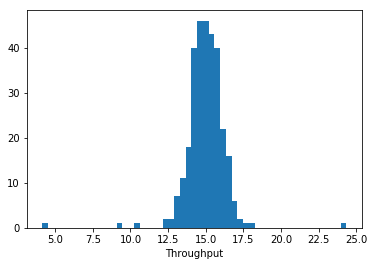

In [64]:
#checking for normal distribution
plt.hist(X.iloc[:,0],bins = 'auto')
plt.xlabel('Latency')
plt.show()

plt.hist(X.iloc[:,1],bins = 'auto')
plt.xlabel('Throughput')
plt.show()

In [65]:
mu, sigma2 = estimate_gaussian(X)
covariance = np.cov(X.iloc[:,0], X.iloc[:,1])

X['pdf'] = np.nan
for y in range(len(X)):
    temp = [X.iloc[y,0], X.iloc[y,1]]
    X.loc[y,'pdf'] = multivariate_gaussian(temp,mu,covariance)

In [67]:
X_outlier = X[X.pdf <= 9e-5]
X_outlier

,Latency (ms),Throughput (mb/s),pdf
300,13.079310,9.347878,3.413349e-06
301,21.727134,4.126232,2.641222e-21
303,19.582573,10.411619,2.857102e-07
304,23.339868,16.298874,1.349858e-12
305,18.261188,17.978309,2.243722e-05
306,4.752613,24.350407,9.347049e-21


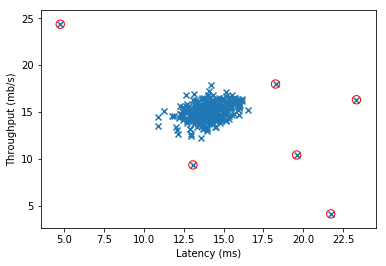

In [68]:
# plot the data
plt.scatter(X.iloc[:,0],X.iloc[:,1],marker="x")

# Circling of anomalies
plt.scatter(X_outlier.iloc[:,0],X_outlier.iloc[:,1],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

plt.show()

In [70]:
X2 = pd.read_csv('X2.csv')



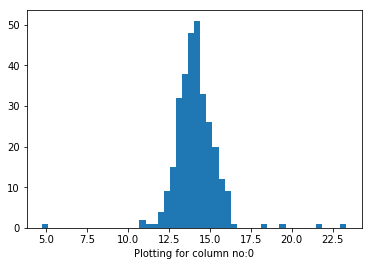

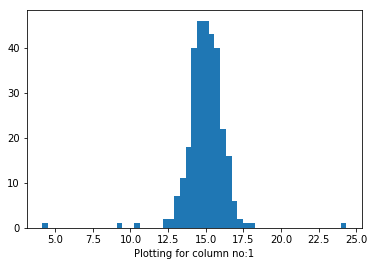

In [74]:
#checking for normal distribution
for y in range(X2.shape[1]):
    plt.hist(X.iloc[:,y],bins = 'auto')
    plt.xlabel('Plotting for column no:'+str(y))
    plt.show()